## Oil Price Analysis

#### Importing necessary libraries

In [10]:
import os
import sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
sys.path.append(os.path.abspath('../scripts'))
from Utils import DataUtils
from Plotting import Plots

data_utils = DataUtils()
plots = Plots()

#### Explanatory data analysis

In [3]:
# Loading data
price = data_utils.load_data('BrentOilPrices.csv')

2024-11-01 20:18 - DEBUG :: Loading data from file...


In [5]:
price.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
data_utils.data_info(price)


Dataset Overview
---------------------
- Total rows: 9011
- Total columns: 2

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


,Missing Values,Missing Percentage,Data Types


#### Sesonal decompose

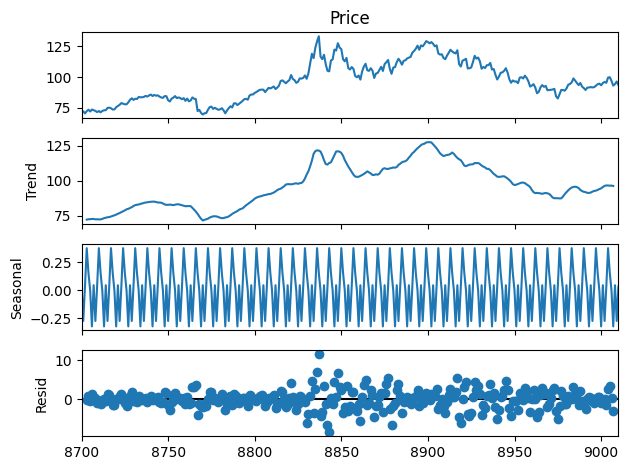

In [ ]:
# Weekly seasonal decompose
plots.plot_seasonal_decompose(8700, 7, price)

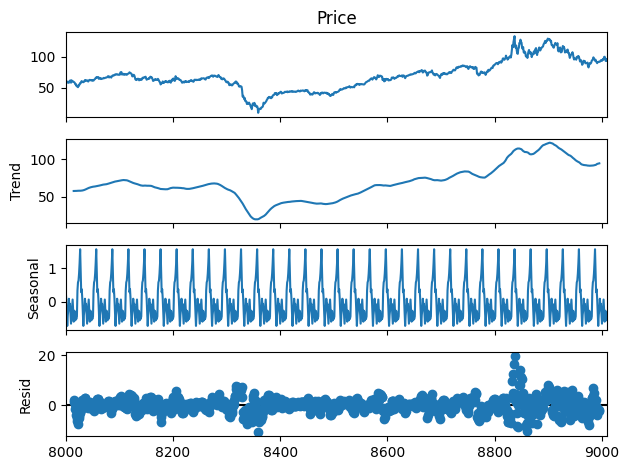

In [5]:
# Monthly seasonal decompose
plots.plot_seasonal_decompose(8000, 30, price)

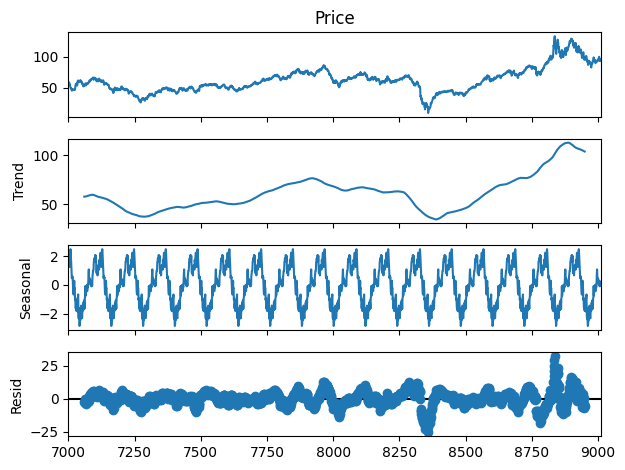

In [9]:
# Quarterly seasonal decompose
plots.plot_seasonal_decompose(7000, 120, price)

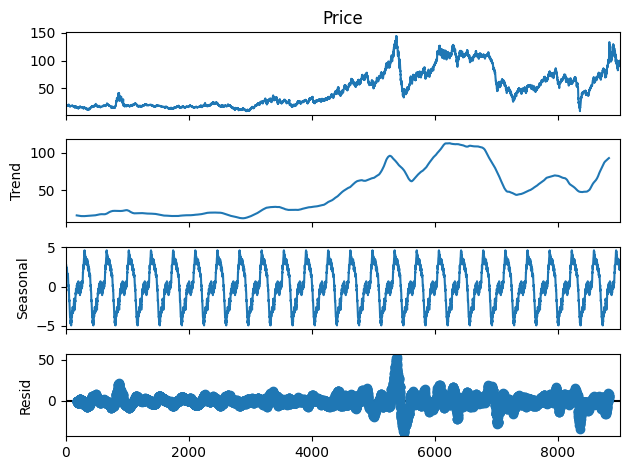

In [ ]:
# Yearly seasonal decompose
plots.plot_seasonal_decompose(0, 360, price)

**Observation**:
* From the above plots, we can see that there is a clear seasonality in weekly, monthly, yearly, and quarterly oil prices.


#### Autocorrelation 

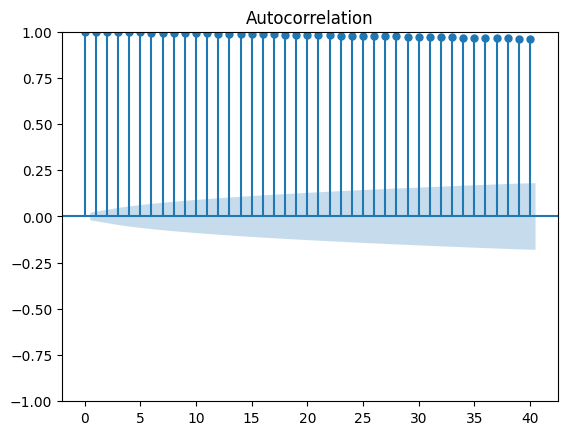

In [23]:
series = price['Price']
plot_acf(series)
plt.show()

**Key Observations:**
1. High Autocorrelation Across Lags:
    * The values are close to 1 for nearly all lags, indicating a very strong positive correlation between values in the time series across a wide range of lag values. This suggests that past values are strongly related to current values, which is characteristic of non-stationary time series data.

2. No Decline Over Lags:
    * The lack of decline in the autocorrelation values over time also points to non-stationarity. For stationary data, we would expect autocorrelations to drop off or approach zero as lag increases.

3. Confidence Interval:
    * The blue-shaded area represents the confidence interval (often around 95%). Ideally, values within this area are considered statistically insignificant. Here, almost all lags are above the confidence interval, further emphasizing high autocorrelation across the series.

**Interpretation:**
  * This autocorrelation plot indicates that the time series is likely non-stationary, meaning it has trends or patterns that do not stabilize over time. 


#### Partial Autocorrelation

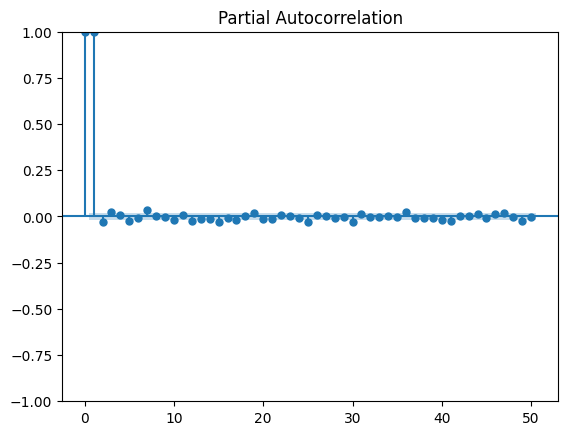

In [24]:
series = price['Price']
plot_pacf(series, lags=50)
plt.show()

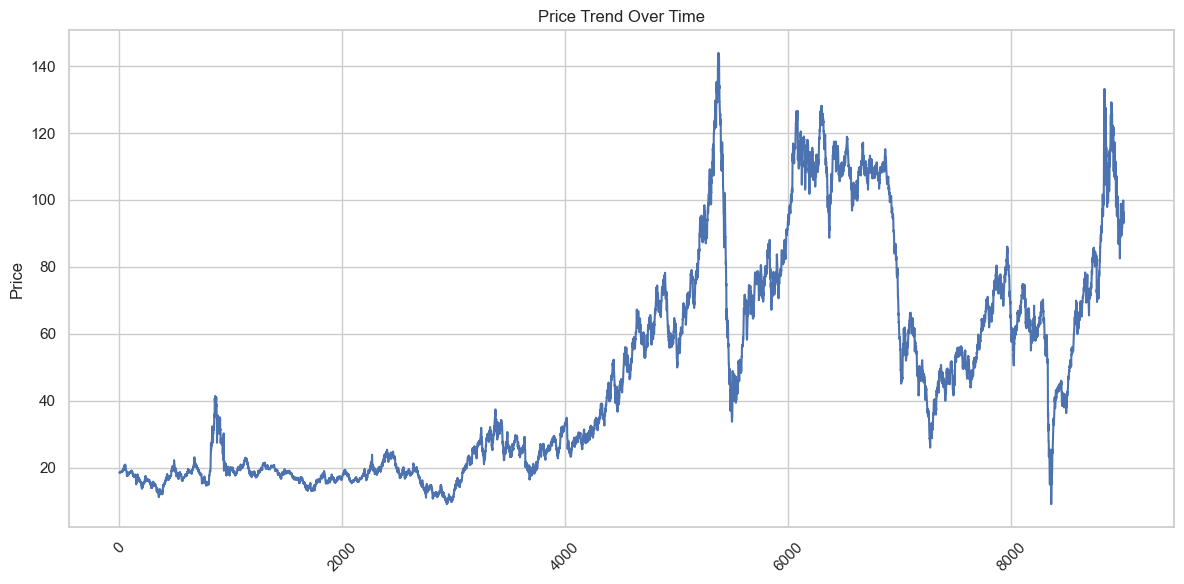

In [ ]:
# Plot the data
plots.plot_data(price)